=== Accuracy for different K values ===
K=1 → Accuracy: 0.978
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]] 

K=3 → Accuracy: 1.000
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]] 

K=5 → Accuracy: 1.000
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]] 

K=7 → Accuracy: 1.000
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]] 



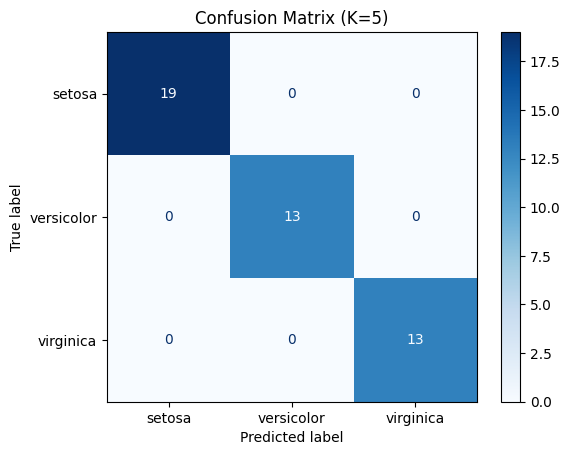

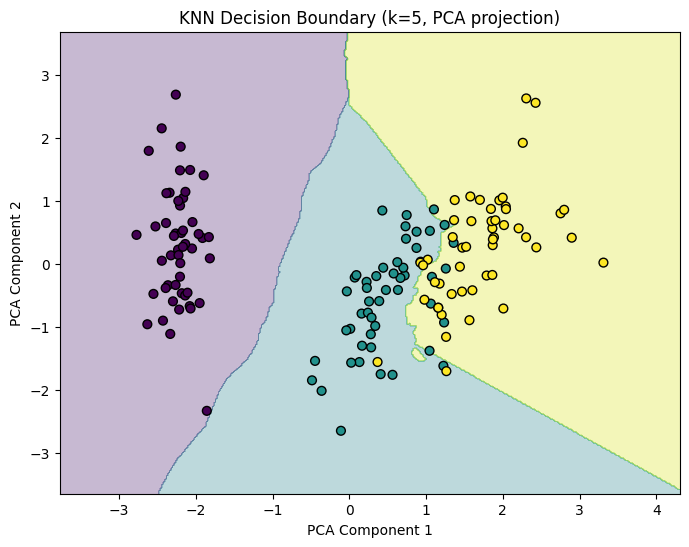

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load dataset
iris = datasets.load_iris()
X = iris.data   # all 4 features for training
y = iris.target

# 2. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 4. Experiment with different K values
k_values = [1, 3, 5, 7]
print("=== Accuracy for different K values ===")
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"K={k} → Accuracy: {acc:.3f}")
    print(cm, "\n")

# 5. Choose best K (you can choose based on above results)
best_k = 5
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred_best = model.predict(X_test)

# 6. Confusion matrix for best K
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best),
                              display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

# 7. PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Retrain KNN on PCA-reduced features for plotting decision boundary
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)
model_pca = KNeighborsClassifier(n_neighbors=best_k)
model_pca.fit(X_train_pca, y_train_pca)

# 8. Plot decision boundaries
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=40)
plt.title(f"KNN Decision Boundary (k={best_k}, PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
